# Time Series Analysis



This exercise covers:
- Working with datetime objects
- Time-based indexing
- Resampling and window operations
- Handling missing data in time series


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample time series data
dates = pd.date_range('2023-01-01', periods=100, freq='D')
prices = np.random.normal(100, 10, 100).cumsum()
df = pd.DataFrame({'date': dates, 'price': prices})
df.set_index('date', inplace=True)


In [ ]:
print(df)

In [ ]:
# Round prices to nearest integer and convert to int type
df['price'] = df['price'].round().astype(int)
print(df)

### Task 1: Resampling
Your task: Resample the data to weekly frequency and calculate the mean price for each week
Expected: A Series with weekly mean prices

In [ ]:
weekly_mean = df.resample('W').mean()
print(weekly_mean)

### Task 2: Rolling windows
Your task: Calculate a 7-day rolling average of the price
Expected: A Series with the rolling average values

In [ ]:

rolling_avg = df['price'].rolling(window=7).mean()
print(rolling_avg.head(15))


In [ ]:
# Forward fill to handle NaN values at the start
rolling_filled = rolling_avg.fillna(method='bfill')
print(rolling_filled.head(15))

### Task 3: Time-based operations
Your task: Calculate the day-over-day percentage change in price
Expected: A Series with percentage changes

In [ ]:

pct_change = df['price'].pct_change() * 100
print(pct_change.head(15))

In [ ]:
# Merge the DataFrames to include the percentage change so i can see it alongside the original price data
merged = pd.merge(df, pct_change.rename('pct_change'), on='date')
print(merged.round().head(15))

### Task 4: Handling missing data
Create some missing values

In [ ]:
df_missing = df.copy()
df_missing.iloc[10:15] = np.nan
print(df_missing.head(20))


### Your task: Handle the missing values using the following methods:
 1. Forward fill
 2. Linear interpolation
 3. Rolling window imputation (7-day window)
 Expected: Three different Series with different imputation methods

In [ ]:

ffill = df_missing.fillna(method='ffill')
interpolated = df_missing.interpolate(method='linear')
rolling = df_missing.rolling(window=7, min_periods=1).mean()
print("Forward Fill:\n", ffill.head(20))

In [ ]:
print("Linear Interpolation:\n", interpolated.head(20))

In [ ]:
print("Rolling Window Imputation:\n", rolling.head(20))


### Task 6: Visualization
Your task: Create a plot with the following elements:
 1. Original price series
 2. 7-day rolling average
 3. Highlight periods with missing values
 Expected: A single plot with all elements clearly labeled


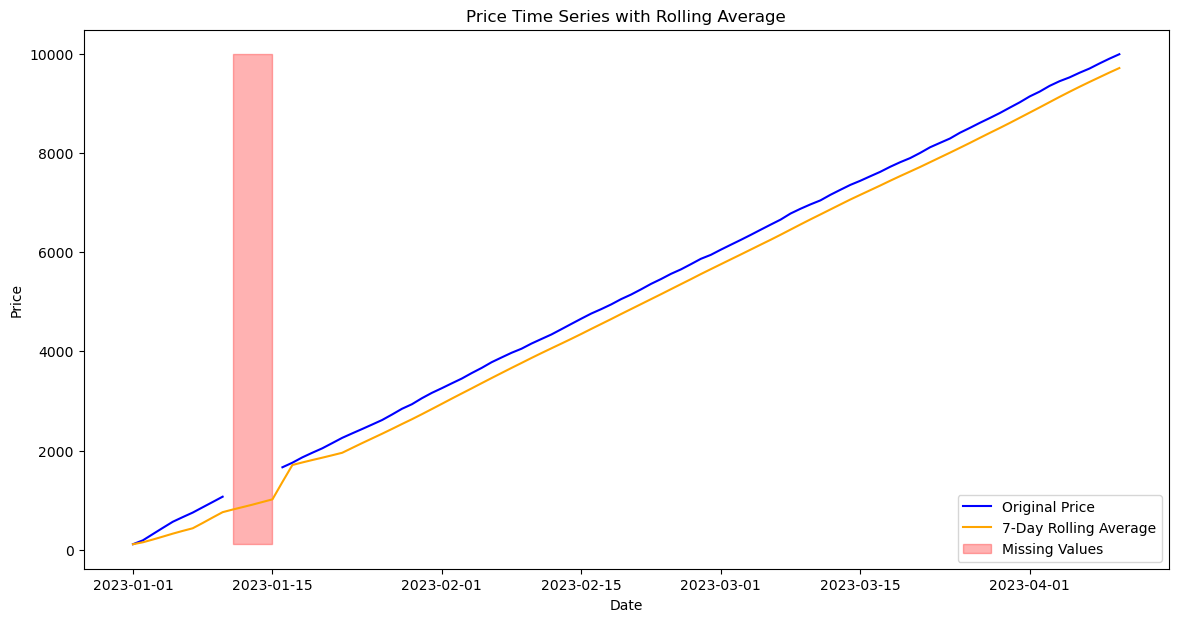

In [23]:
# --- 2. Calculations ---
# Calculate the 7-day rolling average. The `min_periods=1` ensures it calculates
# even if there are fewer than 7 data points at the start.
df_missing['rolling_avg_7d'] = df_missing['price'].rolling(window=7, min_periods=1).mean()
# Identify missing values
df_missing['is_missing'] = df_missing['price'].isna()
# --- 3. Plotting ---
plt.figure(figsize=(14, 7))
plt.plot(df_missing.index, df_missing['price'], label='Original Price', color='blue')
plt.plot(df_missing.index, df_missing['rolling_avg_7d'], label='7-Day Rolling Average', color='orange')
# Highlight missing value periods
plt.fill_between(df_missing.index, df_missing['price'].min(), df_missing['price'].max(), where=df_missing['is_missing'], color='red', alpha=0.3, label='Missing Values')
plt.title('Price Time Series with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
